In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

In [2]:
df = pd.read_csv(r"C:\Users\Navab Pasha\Desktop\prodigy 3\bank\bank.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [4]:
df.shape


(4521, 17)

In [5]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


None

In [7]:
df.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


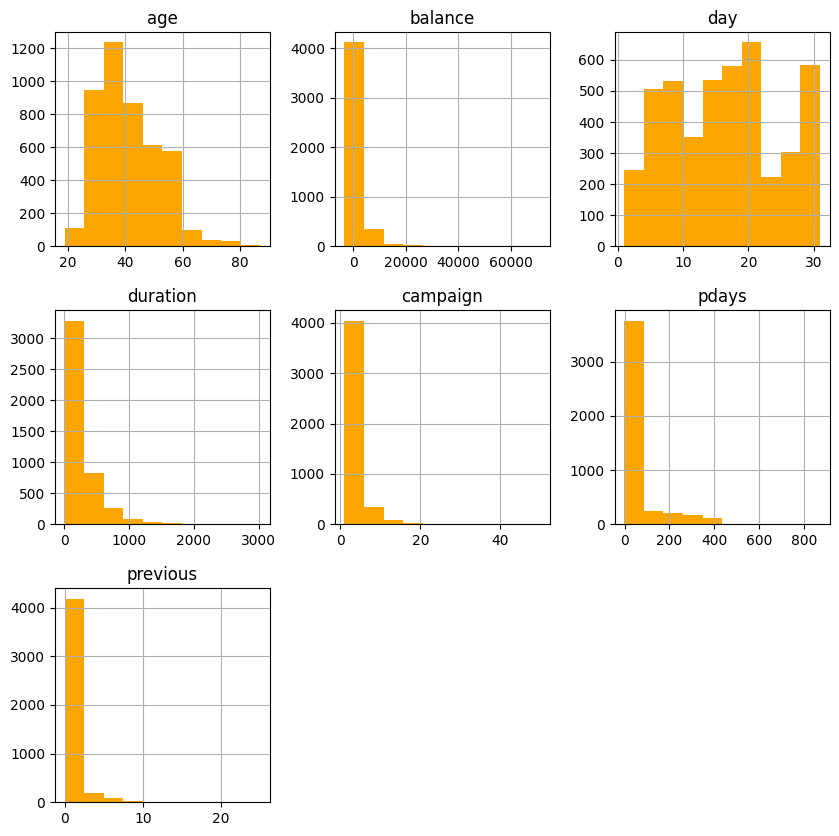

In [8]:
df.hist(figsize=(10,10),color='orange')
plt.show()

In [9]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


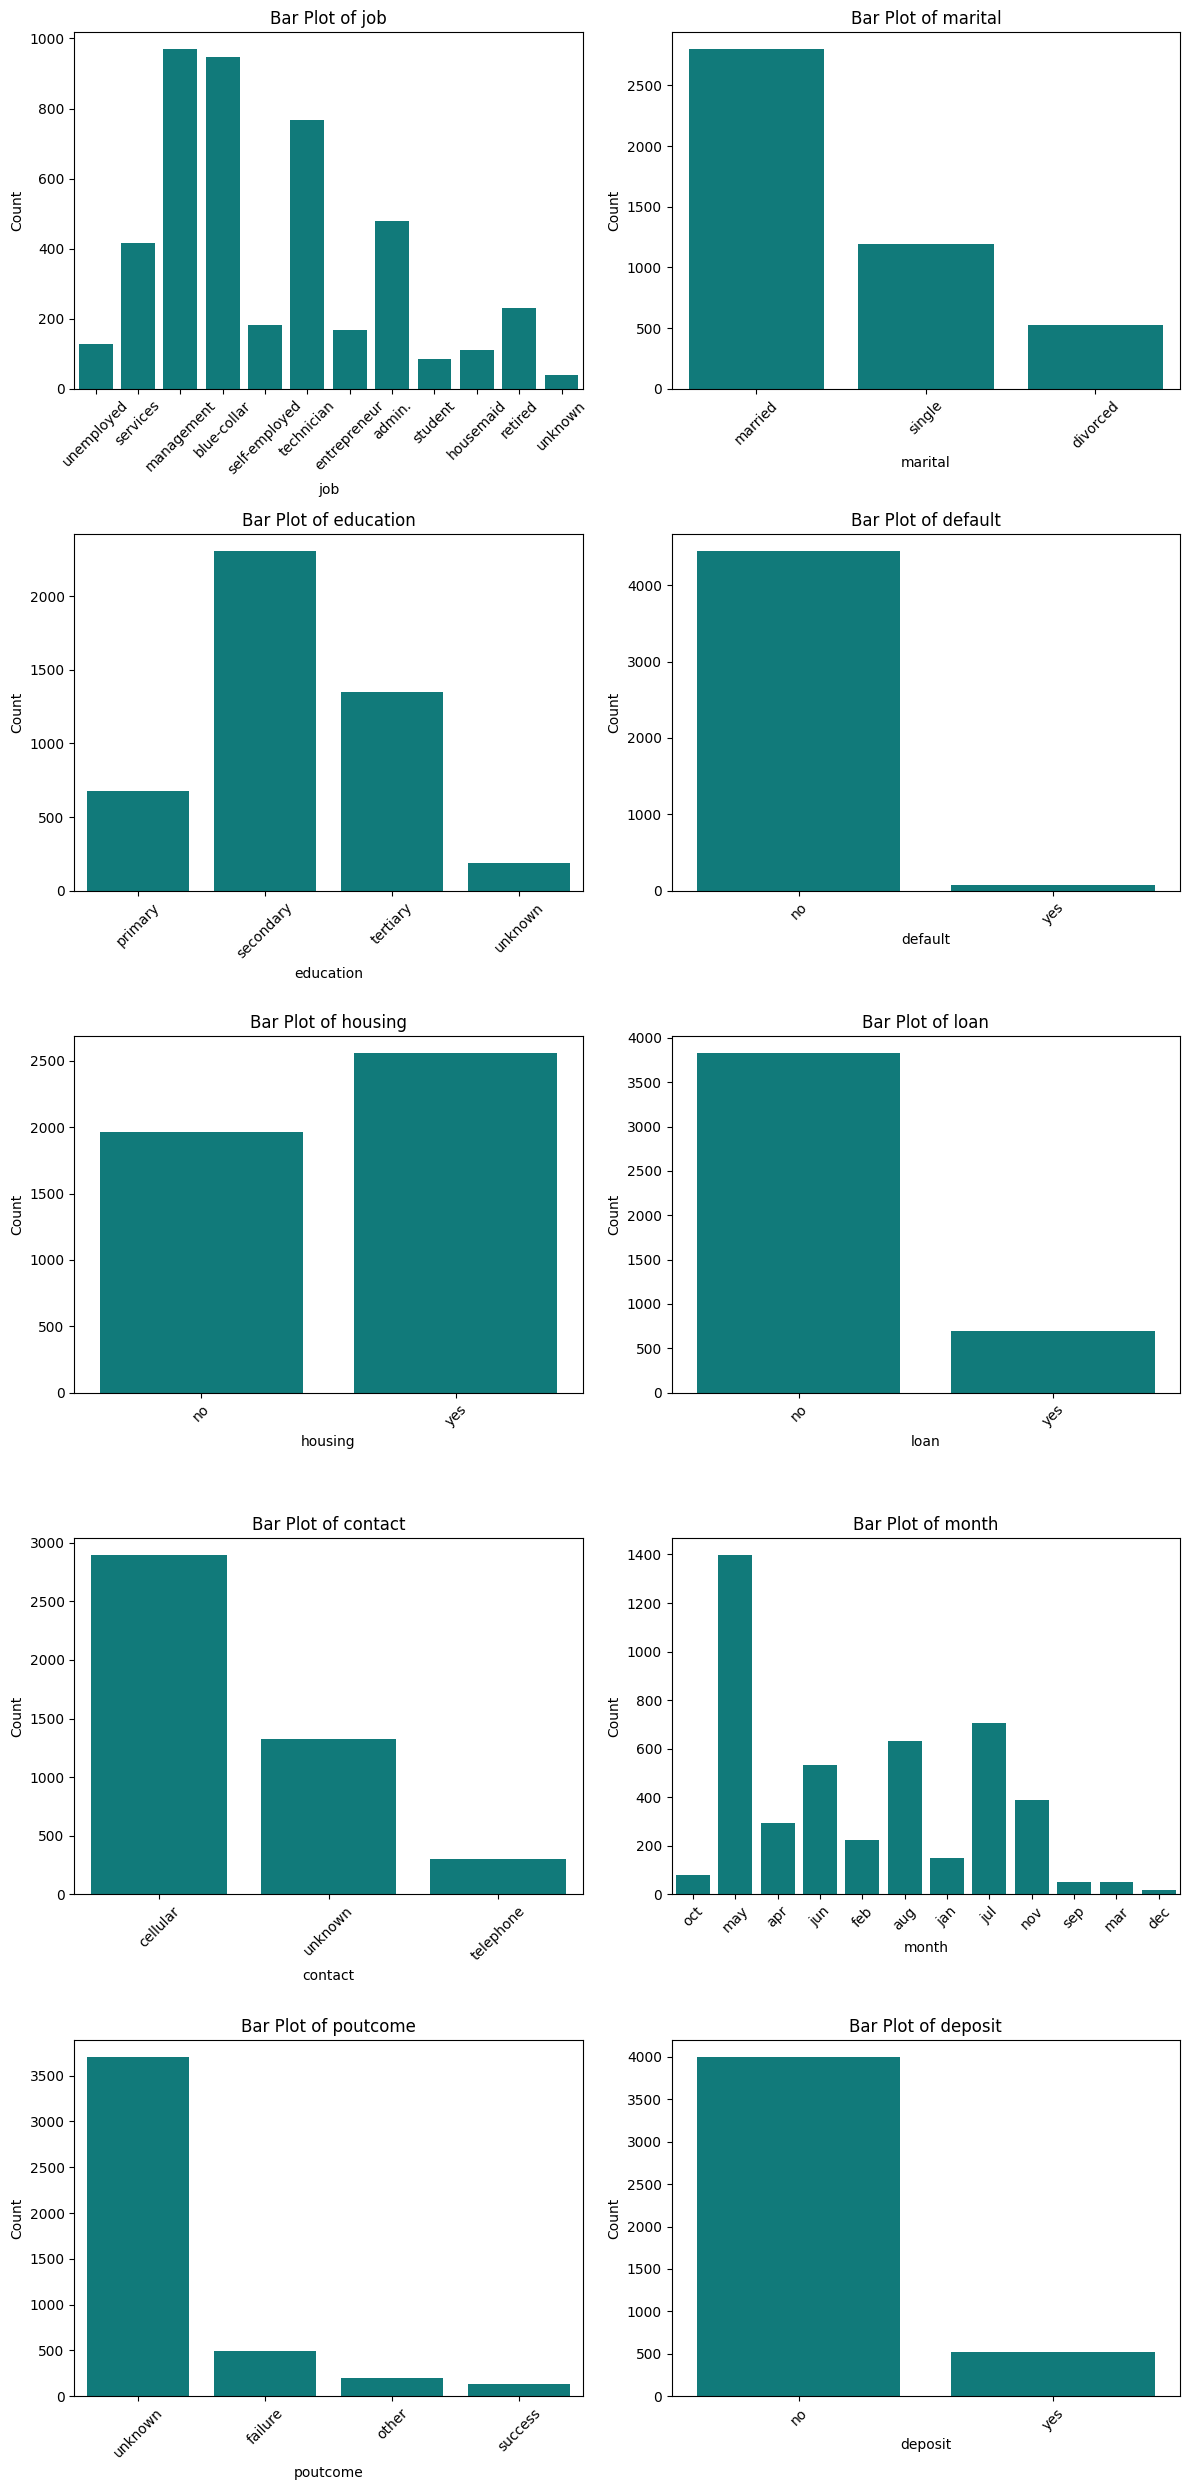

In [10]:
cat_cols = df.select_dtypes(include='object').columns
cols = 2
rows = (len(cat_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows))
axes = axes.flatten()
for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature, data=df, ax=axes[i], color='darkcyan')
    axes[i].set_title(f'Bar Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: >

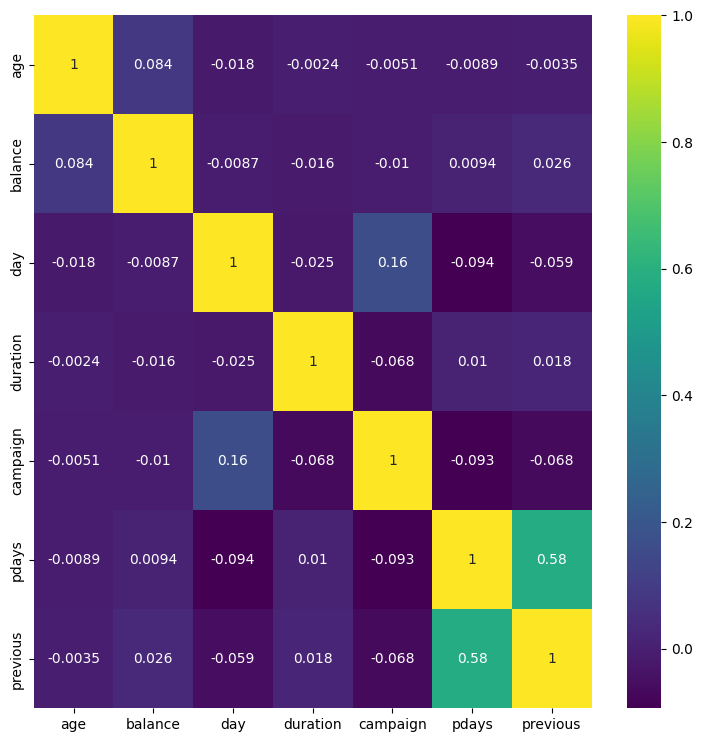

In [11]:
plt.figure(figsize=(9, 9))
numeric_columns = df.select_dtypes(include=np.number)
corr = numeric_columns.corr()
sns.heatmap(data=corr, annot=True, cmap='viridis')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [13]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [14]:
df1 = df1.dropna()

In [15]:
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)

In [16]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [17]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=10)
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


accuracy_train = accuracy_score(y_train, y_train_pred)*100
print(f"Training Accuracy: {accuracy_train:.2f}%")
accuracy_test = accuracy_score(y_test, y_test_pred)*100
print(f"Testing Accuracy: {accuracy_test:.2f}%")

Training Accuracy: 91.56%
Testing Accuracy: 88.33%


In [18]:
print("\nClassification Report (Test Set):\n")
classification_rep = classification_report(y_test, y_test_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()
print(classification_df)

print("\nConfusion Matrix (Test Set):\n")
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)


Classification Report (Test Set):

              precision    recall  f1-score      support
0              0.914729  0.955466  0.934653   988.000000
1              0.555556  0.384615  0.454545   143.000000
accuracy       0.883289  0.883289  0.883289     0.883289
macro avg      0.735142  0.670040  0.694599  1131.000000
weighted avg   0.869316  0.883289  0.873950  1131.000000

Confusion Matrix (Test Set):

                 Predicted Negative  Predicted Positive
Actual Negative                 944                  44
Actual Positive                  88                  55


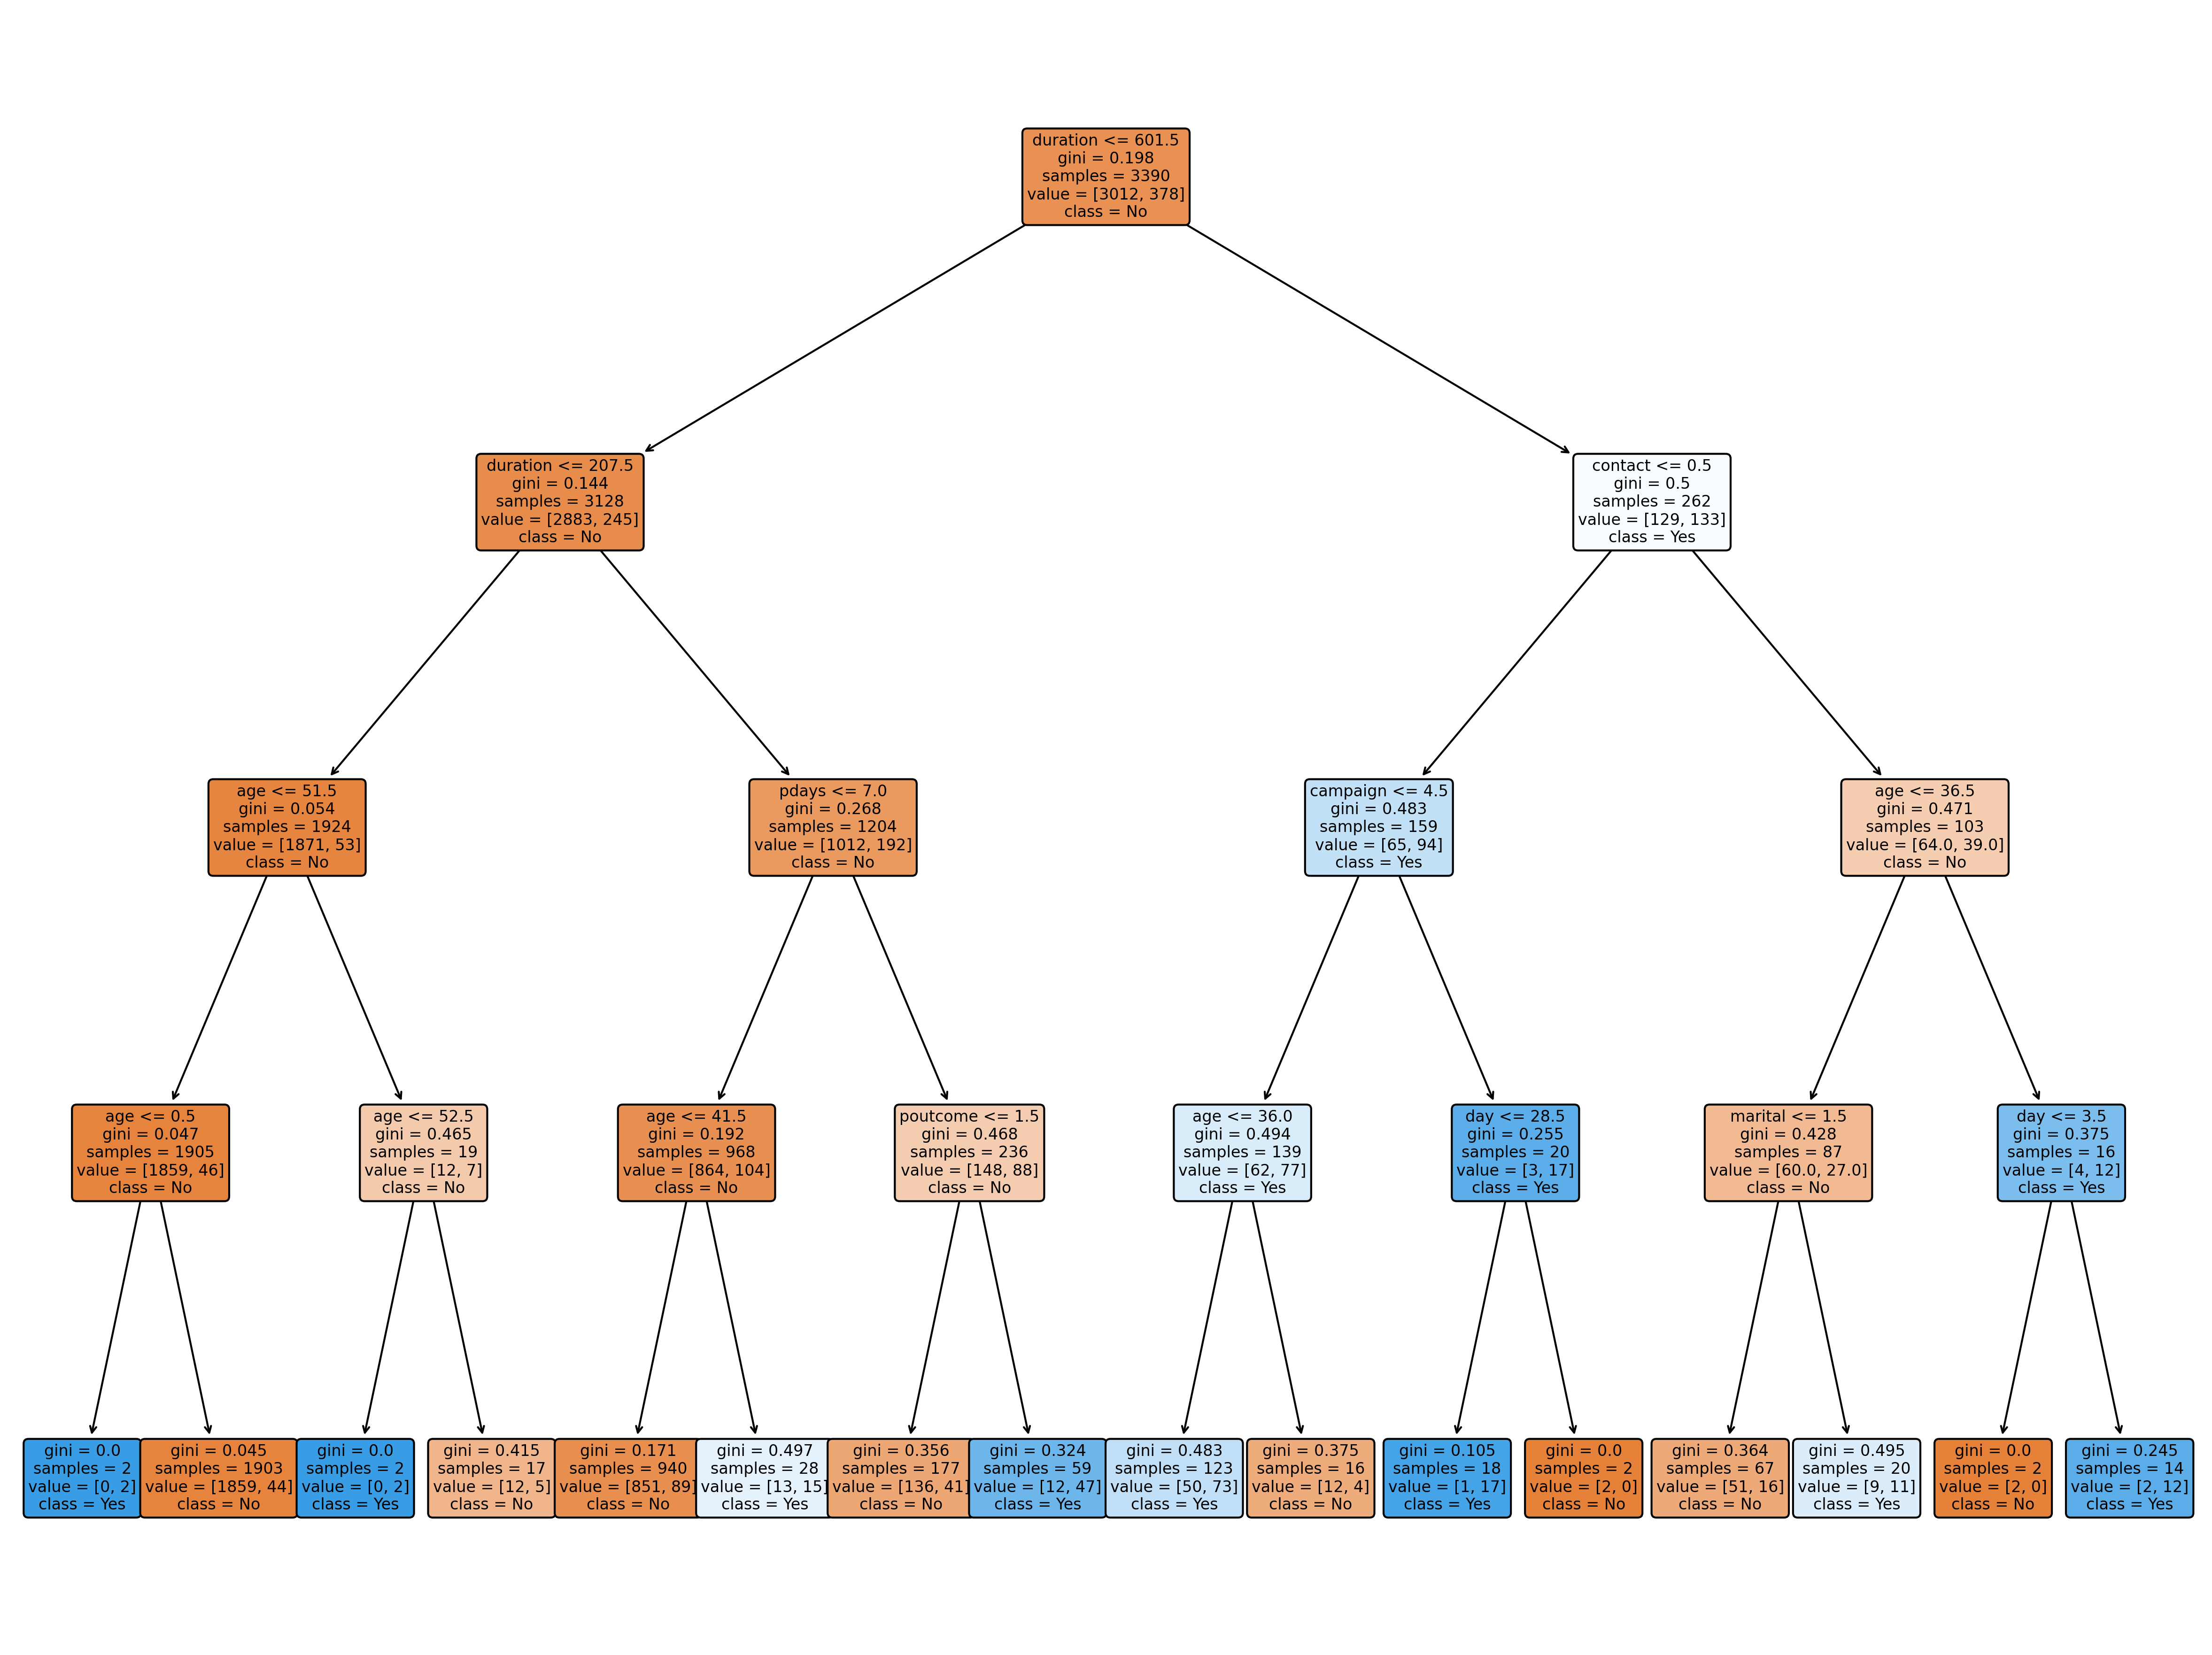

In [19]:
plt.figure(figsize=(20, 15),dpi=300)
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['No', 'Yes'], rounded=True, fontsize=8)
plt.show()